In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv("C:/Users/Lenovo/Desktop/ML PFE/supermarket_sales - Sheet1.csv")

In [4]:
df.drop(['Total','Tax 5%','gross margin percentage','Invoice ID'],inplace=True,axis=1)

In [5]:
import datetime as dt 
df['Date'] = pd.to_datetime(df['Date']) 
df['Date']=df['Date'].map(dt.datetime.toordinal)

In [6]:
df['Time'] = pd.to_datetime(df['Time'])

In [7]:
df['Hour'] = df['Time'].dt.hour
df['Minute'] = df['Time'].dt.minute

df['Minutes_Since_Midnight'] = df['Hour'] * 60 + df['Minute']

In [8]:
df.drop(['Hour','Minute','Time'],inplace=True,axis=1)

In [10]:
le=LabelEncoder()
list_cate = ['Branch','City', 'Customer type', 'Gender', 'Product line', 'Payment']
for i in list_cate:
    df[i]=le.fit_transform(df[i])

In [11]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Payment,cogs,gross income,Rating,Minutes_Since_Midnight
0,0,2,0,0,3,74.69,7,737064,2,522.83,26.1415,9.1,788
1,2,1,1,0,0,15.28,5,737126,0,76.40,3.8200,9.6,629
2,0,2,1,1,4,46.33,7,737121,1,324.31,16.2155,7.4,803
3,0,2,0,1,3,58.22,8,737086,2,465.76,23.2880,8.4,1233
4,0,2,1,1,5,86.31,7,737098,2,604.17,30.2085,5.3,637


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Branch                  1000 non-null   int32  
 1   City                    1000 non-null   int32  
 2   Customer type           1000 non-null   int32  
 3   Gender                  1000 non-null   int32  
 4   Product line            1000 non-null   int32  
 5   Unit price              1000 non-null   float64
 6   Quantity                1000 non-null   int64  
 7   Date                    1000 non-null   int64  
 8   Payment                 1000 non-null   int32  
 9   cogs                    1000 non-null   float64
 10  gross income            1000 non-null   float64
 11  Rating                  1000 non-null   float64
 12  Minutes_Since_Midnight  1000 non-null   int32  
dtypes: float64(4), int32(7), int64(2)
memory usage: 74.3 KB


### Splitting The Data into Training And Testing Dataset

##### Defining the target variable

In [13]:
y=df['gross income']
X=df.drop('gross income',axis=1)

##### Splitting the dataset into training and testing sets (80% for training and 20% for testing)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Defining the model (Linear regression)

In [15]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

##### Training / Testing score

In [16]:
print(f"Train score: {round(model.score(X_train, y_train), 4) * 100} % \nTest score: {round(model.score(X_test, y_test), 4) * 100} %")

Train score: 100.0 % 
Test score: 100.0 %


##### Feature importance

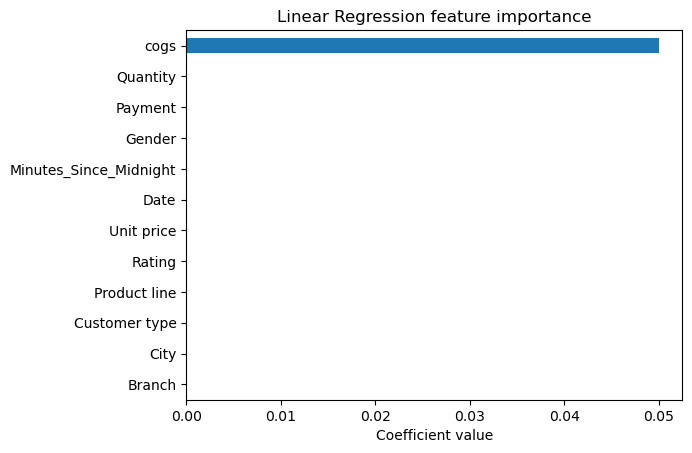

In [21]:
pd.Series(model.coef_, index=X_train.columns).sort_values().plot(kind='barh');
plt.xlabel('Coefficient value')
plt.title('Linear Regression feature importance')
plt.show();

In [22]:
param_grid = {'n_neighbors': np.arange(1, 20), 'metric': ['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [25]:
KNN = grid.best_estimator_
KNN.score(X_test, y_test)

0.9968462193367005

work in progress ...